<a href="https://colab.research.google.com/github/nanaagyei/hands-on-ml/blob/main/Chapter4_homl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

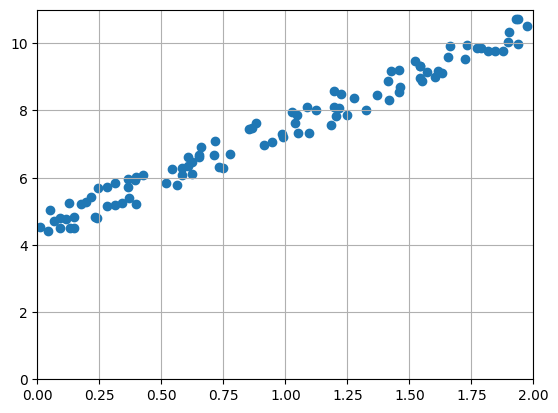

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # number of instances or examples
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1) # the equation used was y = 4 + 3x + Gaussian noise

plt.scatter(X,y)
plt.axis([0, 2, 0, 11])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

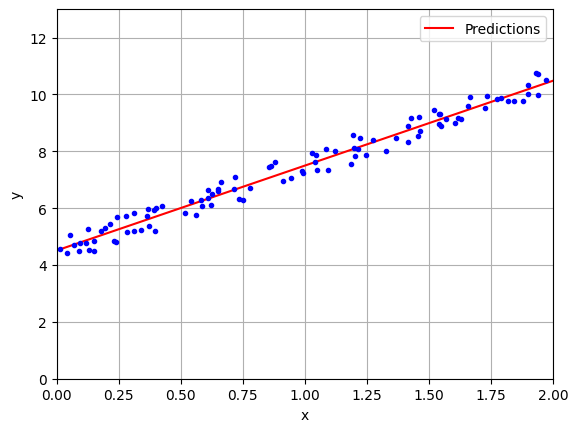

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.axis([0,2, 0, 13])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_, lin_reg.intercept_

(array([[2.98323418]]), array([4.51359766]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [ ]:
# implementation of batch gradient descent

eta = 0.1 # learning rate
n_epochs = 1000
n = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialize model parameters

for epoch in range(n_epochs):
  gradients = (2 / m)* X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [ ]:
theta

array([[4.51359766],
       [2.98323418]])

In [ ]:
# implementation of stochastic gradient descent using a simple learning schedule:

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
  for iteration in range(m): # we are using individual training set
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi) # no division by m since we're dealing with a single instance
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.coef_, sgd_reg.intercept_

(array([2.99156535]), array([4.50316965]))

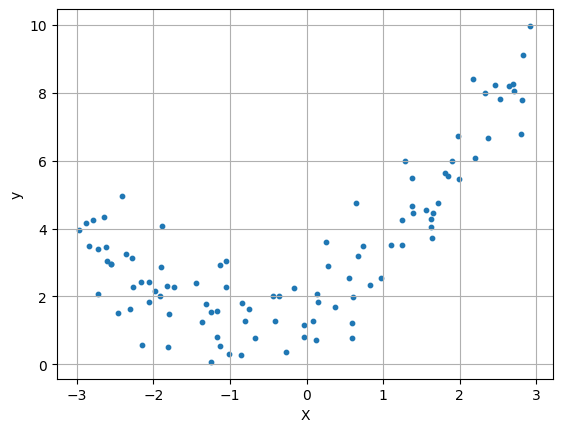

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y, s=10)
plt.grid()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
X_new = np.array([[0.3], [-2.6], [1.5]])
X_newpoly = poly_features.fit_transform(X_new)
y_pred = lin_reg.predict(X_newpoly)
y_pred

array([[2.11225713],
       [3.17024999],
       [4.45211514]])

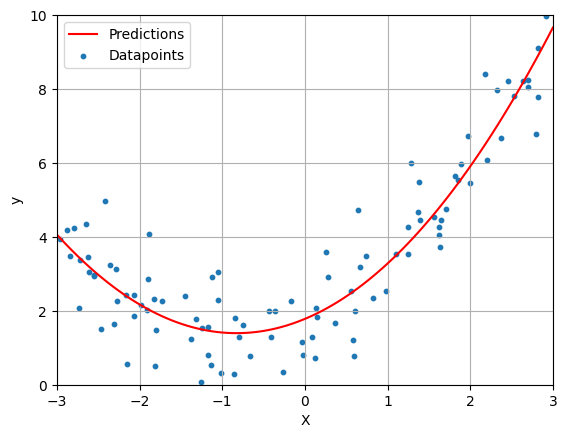

In [ ]:
X_new = np.linspace(-3, 3, 100)
a, b, c = lin_reg.coef_[0][1], lin_reg.coef_[0][0], lin_reg.intercept_

y_pred = a * X_new ** 2 + b * X_new + c

plt.plot(X_new, y_pred, "r-", label="Predictions")
plt.scatter(X, y, s=10, label="Datapoints")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

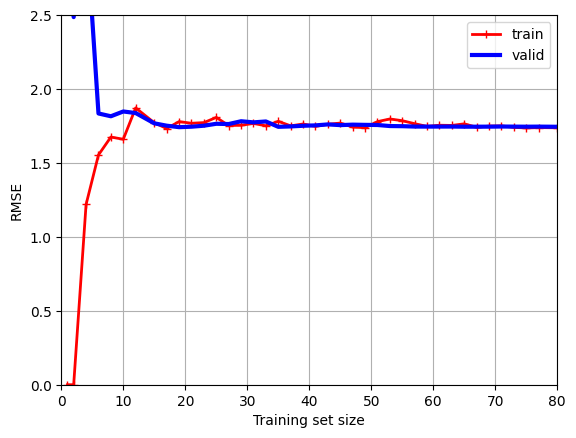

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(True)
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.axis([0, 80, 0, 2.5])
plt.show()

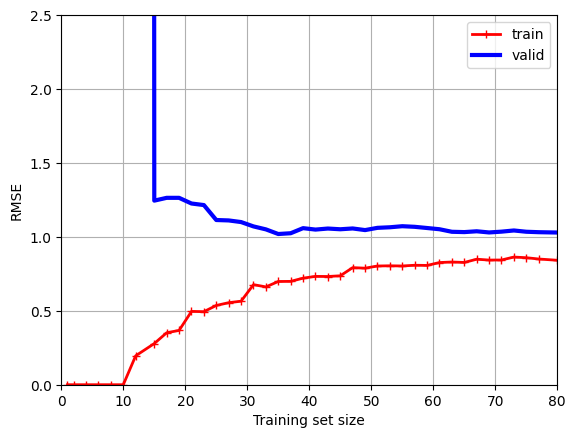

In [ ]:
from sklearn.pipeline import make_pipeline

degree = 10

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(True)
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.axis([0, 80, 0, 2.5])
plt.show()